## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [ ]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display

from sklearn import preprocessing                       # préparation des données

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [2]:
df_mushrooms = pd.read_csv('data/champignons.csv')
df_mushrooms.head()

,toxicite,surface-chapeau,ecchymoses,attache-lamelles,taille-lamelles,forme-pied,surface-pied-sur-anneau,couleur-pied-sur-anneau,couleur-voile,type-anneau,population
0,toxique,lisse,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
1,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
2,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
3,toxique,écaillée,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
4,comestible,lisse,non,libre,large,effilé,lisse,blanc,blanc,évasé,abondante


In [3]:
print("\nValeurs manquantes par colonne :")
print(df_mushrooms.isnull().sum())


Valeurs manquantes par colonne :
toxicite                   0
surface-chapeau            0
ecchymoses                 0
attache-lamelles           0
taille-lamelles            0
forme-pied                 0
surface-pied-sur-anneau    0
couleur-pied-sur-anneau    0
couleur-voile              0
type-anneau                0
population                 0
dtype: int64


In [4]:
print("Nombre de champignons toxiques ou non")
print(df_mushrooms['toxicite'].value_counts())
# Vérifier les valeurs nulles dans la colonne toxicité
print(f"Nombre de valeurs nulles dans 'toxicité' : {df_mushrooms['toxicite'].isnull().sum()}")

Nombre de champignons toxiques ou non
toxicite
comestible    4208
toxique       3916
Name: count, dtype: int64
Nombre de valeurs nulles dans 'toxicité' : 0


1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [24]:
# Encoder avec OneHotEncoder
encoder = preprocessing.OneHotEncoder(sparse_output=False, dtype=int)
encoder.fit(df_mushrooms)
mushrooms_encoded = encoder.transform(df_mushrooms)  # feature de données transformées en numpy array

# Afficher la taille des données
print(f"Taille de df_mushrooms original: {df_mushrooms.shape}")
print(f"Taille de mushrooms_encoded : {mushrooms_encoded.shape}")

print("\n")

# Récupérer les noms des colonnes générées
feature_names = encoder.get_feature_names_out(df_mushrooms.columns)

# Affichage en regroupant par feature d'origine
for col in df_mushrooms.columns:
    # Filtrer les colonnes qui correspondent à cette feature
    cols_for_feature = [name for name in feature_names if name.startswith(col)]
    print(f"\n{col} ({len(cols_for_feature)} modalités) :")
    for col_name in cols_for_feature:
        print(f"  - {col_name}")


Taille de df_mushrooms original: (8124, 11)
Taille de mushrooms_encoded : (8124, 42)



toxicite (2 modalités) :
  - toxicite_comestible
  - toxicite_toxique

surface-chapeau (4 modalités) :
  - surface-chapeau_fibreuse
  - surface-chapeau_lisse
  - surface-chapeau_rainurée
  - surface-chapeau_écaillée

ecchymoses (2 modalités) :
  - ecchymoses_non
  - ecchymoses_oui

attache-lamelles (2 modalités) :
  - attache-lamelles_adhérent
  - attache-lamelles_libre

taille-lamelles (2 modalités) :
  - taille-lamelles_large
  - taille-lamelles_étroit

forme-pied (2 modalités) :
  - forme-pied_effilé
  - forme-pied_élargissant

surface-pied-sur-anneau (4 modalités) :
  - surface-pied-sur-anneau_fibreuse
  - surface-pied-sur-anneau_lisse
  - surface-pied-sur-anneau_soyeuse
  - surface-pied-sur-anneau_écaillée

couleur-pied-sur-anneau (9 modalités) :
  - couleur-pied-sur-anneau_beige
  - couleur-pied-sur-anneau_blanc
  - couleur-pied-sur-anneau_brun
  - couleur-pied-sur-anneau_cannelle
  - couleur-

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [25]:
# DataFrame avec les données encodées
df_mushrooms_encoded = pd.DataFrame(mushrooms_encoded,columns=feature_names,dtype=int)

# On mélange les données
df_mushrooms_encoded_shuffled = df_mushrooms_encoded.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nInformations sur le DataFrame encodé :")
df_mushrooms_encoded_shuffled.info()

print("\n")

print("\nPremières lignes (après mélange) :")
df_mushrooms_encoded_shuffled.head()



Informations sur le DataFrame encodé :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   toxicite_comestible               8124 non-null   int64
 1   toxicite_toxique                  8124 non-null   int64
 2   surface-chapeau_fibreuse          8124 non-null   int64
 3   surface-chapeau_lisse             8124 non-null   int64
 4   surface-chapeau_rainurée          8124 non-null   int64
 5   surface-chapeau_écaillée          8124 non-null   int64
 6   ecchymoses_non                    8124 non-null   int64
 7   ecchymoses_oui                    8124 non-null   int64
 8   attache-lamelles_adhérent         8124 non-null   int64
 9   attache-lamelles_libre            8124 non-null   int64
 10  taille-lamelles_large             8124 non-null   int64
 11  taille-lamelles_étroit            8124 non-null   int64

,toxicite_comestible,toxicite_toxique,surface-chapeau_fibreuse,surface-chapeau_lisse,surface-chapeau_rainurée,surface-chapeau_écaillée,ecchymoses_non,ecchymoses_oui,attache-lamelles_adhérent,attache-lamelles_libre,...,type-anneau_fibreux,type-anneau_large,type-anneau_pendant,type-anneau_évasé,population_abondante,population_clairsemée,population_dispersée,population_nombreuse,population_solitaire,population_variée
0,1,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


### On a vérifié le One Hot Encoding

1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [27]:
# 3. Extraire le label et supprimer les colonnes de toxicité des features
labels = df_mushrooms_encoded_shuffled['toxicite_toxique']  # Le label est uniquement toxicite_toxique
features = df_mushrooms_encoded_shuffled.drop(['toxicite_toxique', 'toxicite_comestible'], axis=1)  # Les features (on retire toxicite)

print(f"Label : {labels.shape}")
print(f"Features : {features.shape}")

features_train, features_dev, labels_train, labels_dev = train_test_split(
    features,
    labels,
    test_size=0.30,
    random_state=42,
    stratify=labels
)

Label : (8124,)
Features : (8124, 40)


## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

In [28]:
# Créer et entraîner l'arbre de décision
tree_clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(features_train, labels_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

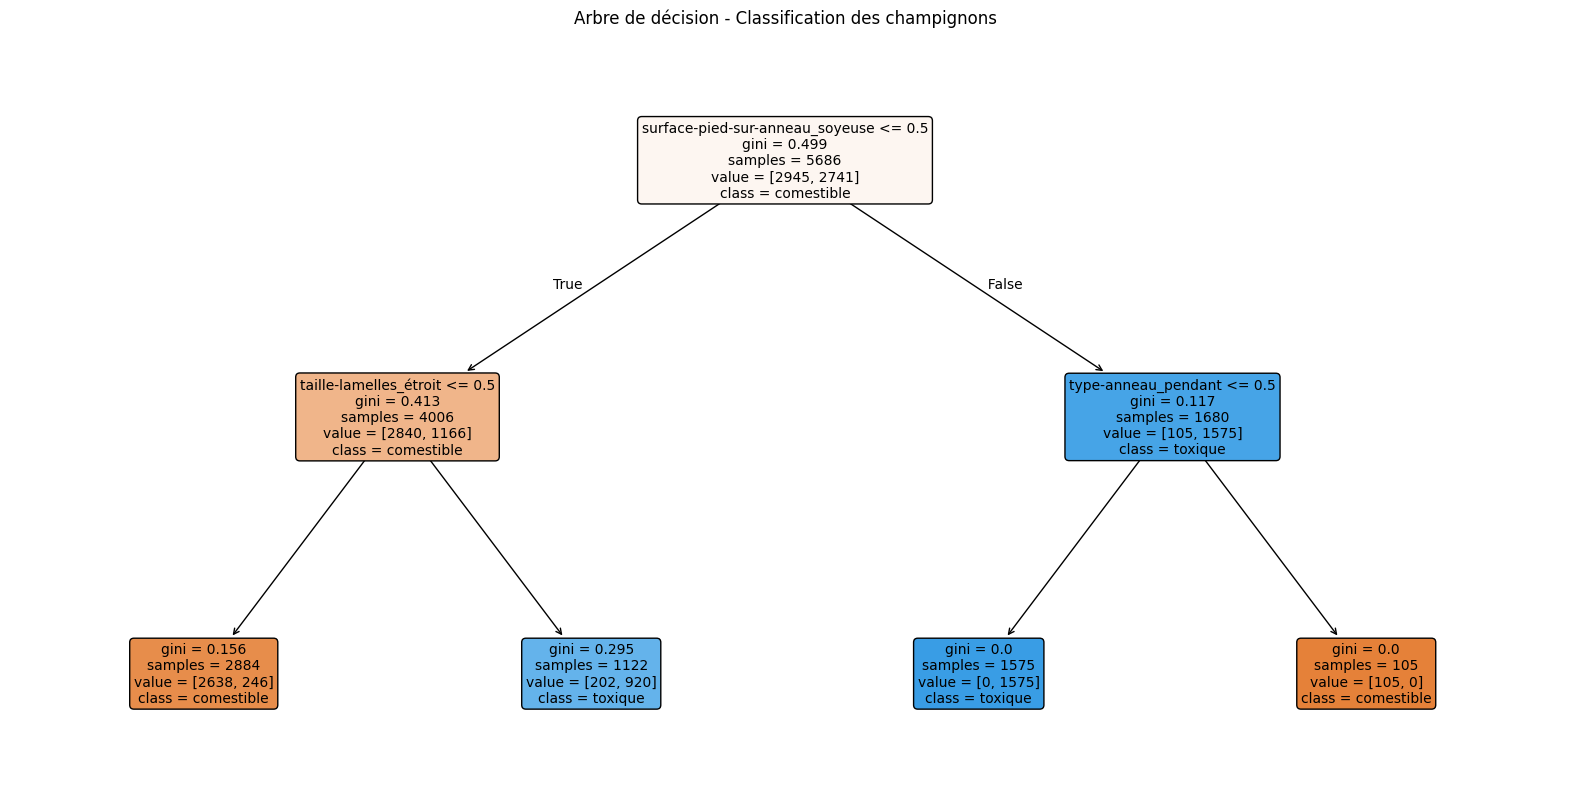

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
tree.plot_tree(
    tree_clf,
    feature_names=features_train.columns,
    class_names=['comestible', 'toxique'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Arbre de décision - Classification des champignons")
plt.show()

2.2 Afficher l'arbre obtenu en utilisant graphwiz

Arbre exporté dans mushrooms_tree.dot


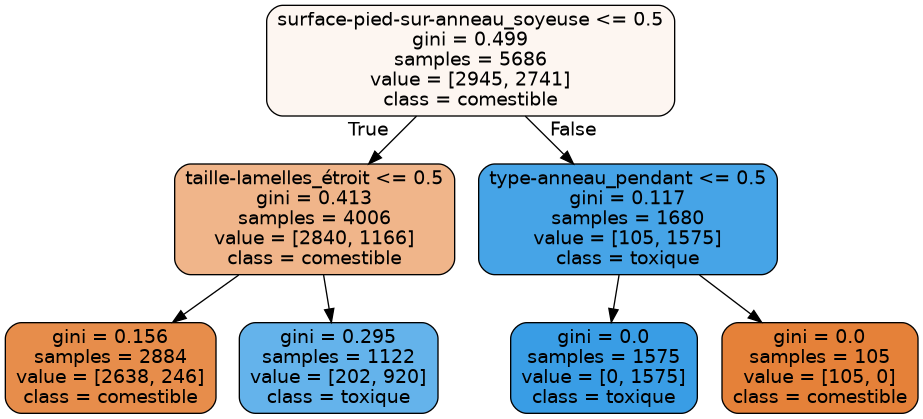

In [30]:
export_graphviz(
    tree_clf,
    out_file="mushrooms_tree.dot",
    feature_names=features_train.columns,
    class_names=['comestible', 'toxique'],
    rounded=True,
    filled=True
)

print("Arbre exporté dans mushrooms_tree.dot")

#appel à la fonction dot de graphwiz
os.system("dot -Tpng mushrooms_tree.dot -o mushrooms_tree.png")
#Affichage de l'image créée
Image("mushrooms_tree.png")

2.3 Mesurer la précision du modèle sur les données de dev

In [33]:
# Prédictions sur les données de dev
predictions_dev = tree_clf.predict(features_dev)

# Précision
accuracy_dev = accuracy_score(labels_dev, predictions_dev)
print(f"Précision sur dev : {accuracy_dev:.4f} ({accuracy_dev*100:.2f}%)")

Précision sur dev : 0.9180 (91.80%)


In [34]:
# On prend un exemple (première ligne)
mon_nouveau_champignon = features_dev.iloc[0:1]

print('Probabilités :', np.round(tree_clf.predict_proba(mon_nouveau_champignon), 2))
print('N° classe :', tree_clf.predict(mon_nouveau_champignon))

# On affiche le résultat proposé par le modèle
classe_noms = ['comestible', 'toxique']
print('Classe :', classe_noms[tree_clf.predict(mon_nouveau_champignon)[0]])

# On compare avec la valeur qu'on aurait du obtenir
print('Vraie classe :', classe_noms[labels_dev.iloc[0]])

Probabilités : [[0.18 0.82]]
N° classe : [1]
Classe : toxique
Vraie classe : toxique


### On peut voir l'influence du max_depth sur la précision 

In [45]:
# Test de différentes profondeurs d'arbre
max_depths = [2, 3, 4, 5, 6, 7]
results = []

for depth in max_depths:
    # Créer et entraîner l'arbre
    tree_clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(features_train, labels_train)

    # Calculer les précisions
    acc_train = tree_clf.score(features_train, labels_train)
    acc_dev = tree_clf.score(features_dev, labels_dev)

    # Stocker les résultats
    results.append({
        'max_depth': depth,
        'accuracy_train': acc_train,
        'accuracy_dev': acc_dev,
        'difference': acc_train - acc_dev
    })

    print(f"max_depth={depth} → Train: {acc_train:.4f} | Dev: {acc_dev:.4f} | Diff: {acc_train - acc_dev:.4f}")

# Affichage des résultats
print("\n" + "="*70)
print("COMPARAISON DES PERFORMANCES")
print("="*70)
for result in results:
    print(f"max_depth={result['max_depth']} : "
          f"Train={result['accuracy_train']*100:.2f}% | "
          f"Dev={result['accuracy_dev']*100:.2f}% | "
          f"Écart={result['difference']*100:.2f}%")
print("="*70)

# Trouver le meilleur modèle
best_result = max(results, key=lambda x: x['accuracy_dev'])
print(f"\n✅ Meilleure profondeur : {best_result['max_depth']} avec {best_result['accuracy_dev']*100:.2f}% sur dev")

max_depth=2 → Train: 0.9212 | Dev: 0.9180 | Diff: 0.0032
max_depth=3 → Train: 0.9291 | Dev: 0.9290 | Diff: 0.0001
max_depth=4 → Train: 0.9420 | Dev: 0.9385 | Diff: 0.0035
max_depth=5 → Train: 0.9817 | Dev: 0.9803 | Diff: 0.0014
max_depth=6 → Train: 0.9852 | Dev: 0.9836 | Diff: 0.0016
max_depth=7 → Train: 0.9910 | Dev: 0.9897 | Diff: 0.0013

COMPARAISON DES PERFORMANCES
max_depth=2 : Train=92.12% | Dev=91.80% | Écart=0.32%
max_depth=3 : Train=92.91% | Dev=92.90% | Écart=0.01%
max_depth=4 : Train=94.20% | Dev=93.85% | Écart=0.35%
max_depth=5 : Train=98.17% | Dev=98.03% | Écart=0.14%
max_depth=6 : Train=98.52% | Dev=98.36% | Écart=0.16%
max_depth=7 : Train=99.10% | Dev=98.97% | Écart=0.13%

✅ Meilleure profondeur : 7 avec 98.97% sur dev


### Cette statistique ne nous permet pas de savoir à partir de quand on fait du sur-entraînement
On va afficher le modèle sur les 3 features les plus importantes pour la classification

In [39]:
# Récupérer les importances
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Top 3 features
top_3_indices = indices[:3]
top_3_features = features_train.columns[top_3_indices]
top_3_importances = importances[top_3_indices]

print("Top 3 features les plus importantes pour visualiser en 2D:")
for i, (feat, imp) in enumerate(zip(top_3_features, top_3_importances), 1):
    print(f"{i}. {feat} : {imp:.4f}")

Top 3 features les plus importantes pour visualiser en 2D:
1. surface-pied-sur-anneau_soyeuse : 0.4807
2. taille-lamelles_étroit : 0.4237
3. type-anneau_pendant : 0.0957


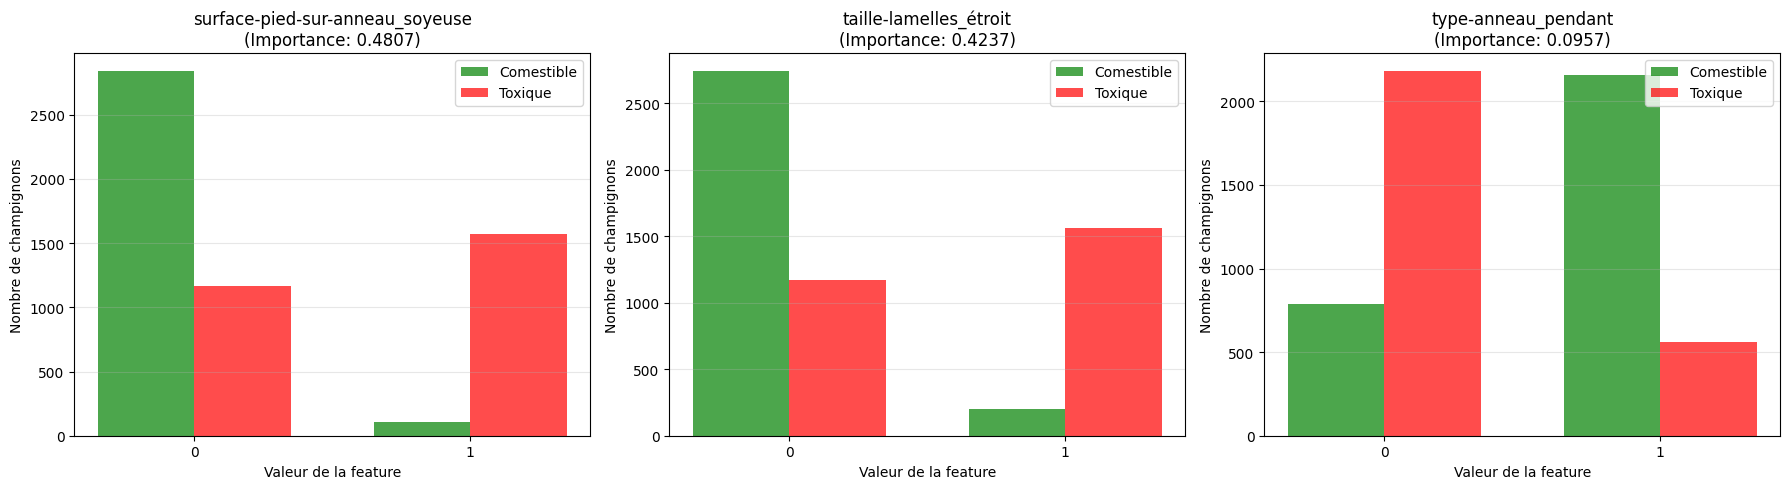

In [40]:
# Créer 3 subplots (un pour chaque feature importante)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (feat_name, ax) in enumerate(zip(top_3_features, axes)):
    # Récupérer la colonne pour train
    feature_values_train = features_train[feat_name]

    # Compter les valeurs par classe
    comestible_0 = np.sum((feature_values_train == 0) & (labels_train == 0))
    comestible_1 = np.sum((feature_values_train == 1) & (labels_train == 0))
    toxique_0 = np.sum((feature_values_train == 0) & (labels_train == 1))
    toxique_1 = np.sum((feature_values_train == 1) & (labels_train == 1))

    # Créer le graphique
    x = np.arange(2)
    width = 0.35

    bars1 = ax.bar(x - width/2, [comestible_0, comestible_1], width, label='Comestible', color='green', alpha=0.7)
    bars2 = ax.bar(x + width/2, [toxique_0, toxique_1], width, label='Toxique', color='red', alpha=0.7)

    ax.set_xlabel('Valeur de la feature')
    ax.set_ylabel('Nombre de champignons')
    ax.set_title(f'{feat_name}\n(Importance: {top_3_importances[i]:.4f})')
    ax.set_xticks(x)
    ax.set_xticklabels(['0', '1'])
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

In [49]:
# Modèle Random Forest
rf_clf = ensemble.RandomForestClassifier(
    n_estimators=500,      # 500 arbres
    max_depth=6,           # Profondeur maximale de 6
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(features_train, labels_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

3.2 Afficher trois arbres au hasard.


Arbre #37 sur 500
Arbre 1 (index 37) :


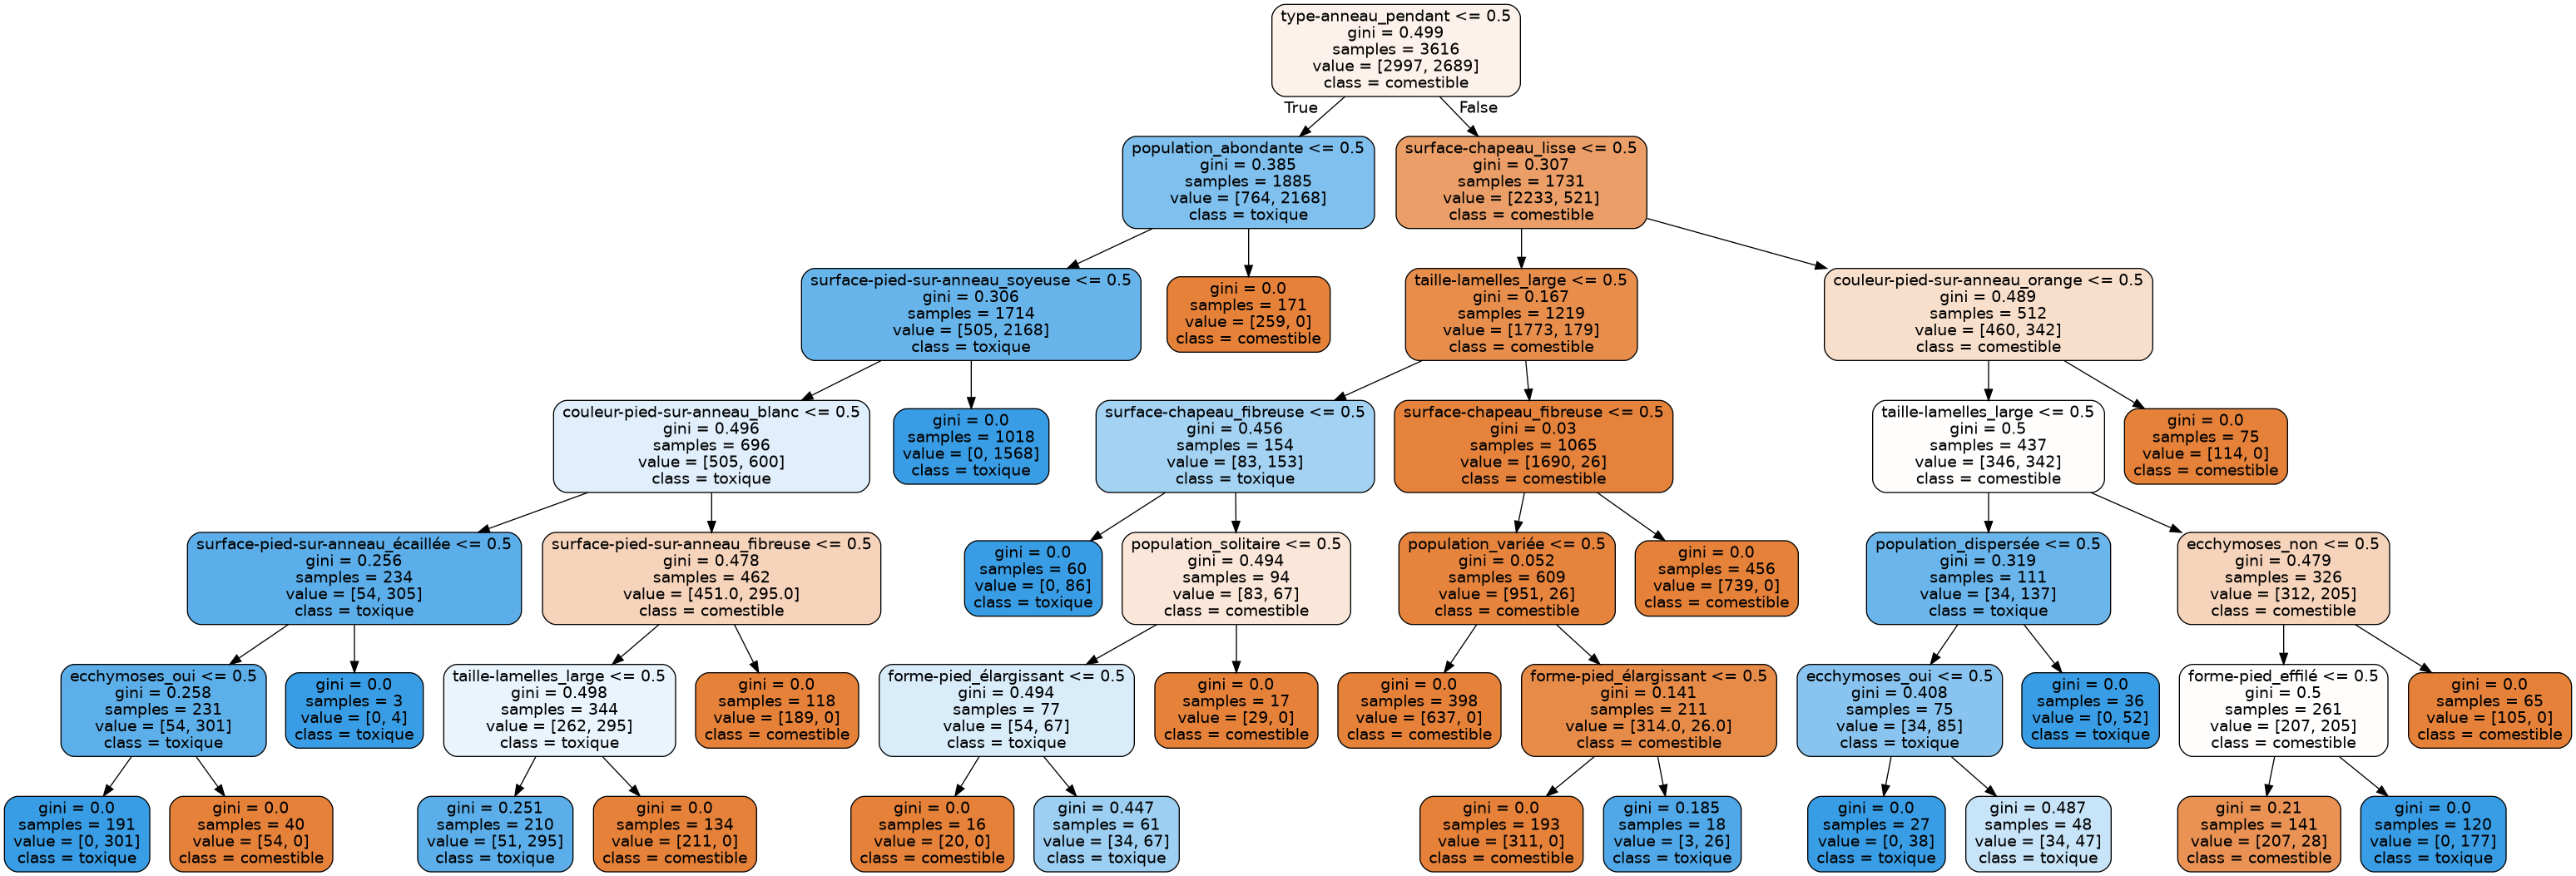


Arbre #252 sur 500
Arbre 2 (index 252) :


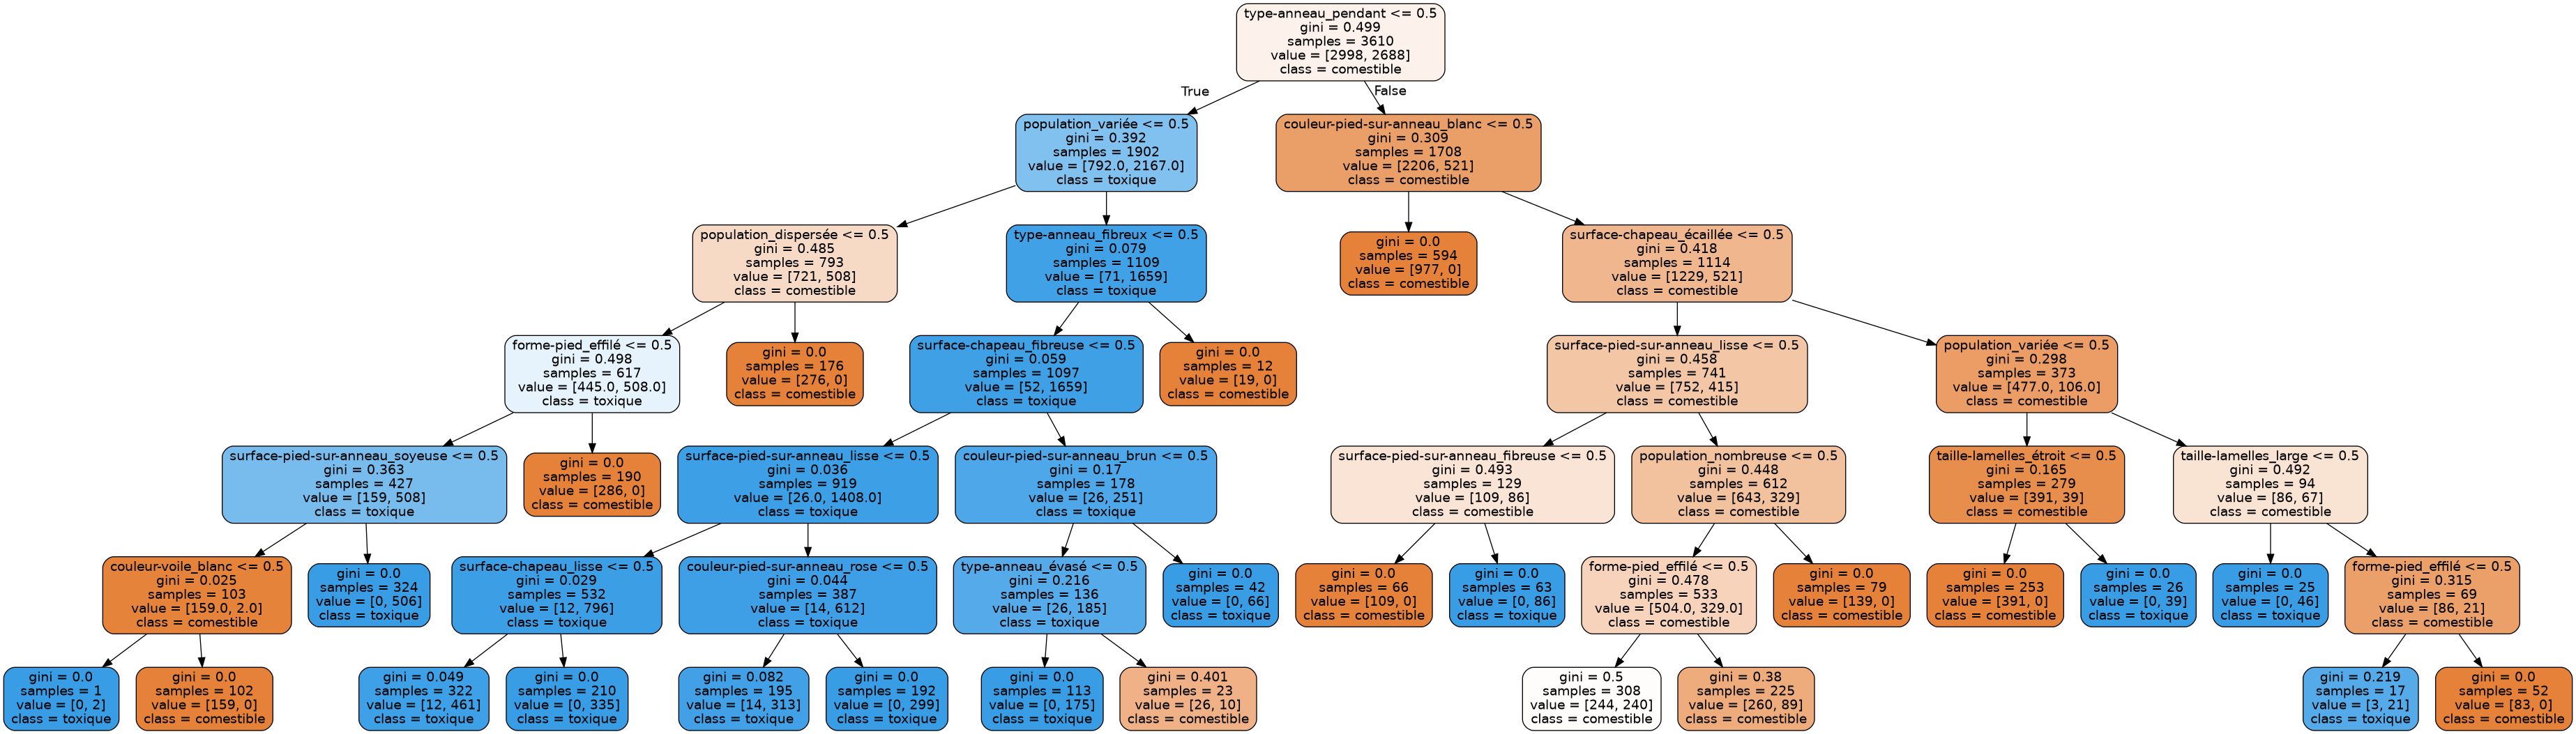


Arbre #40 sur 500
Arbre 3 (index 40) :


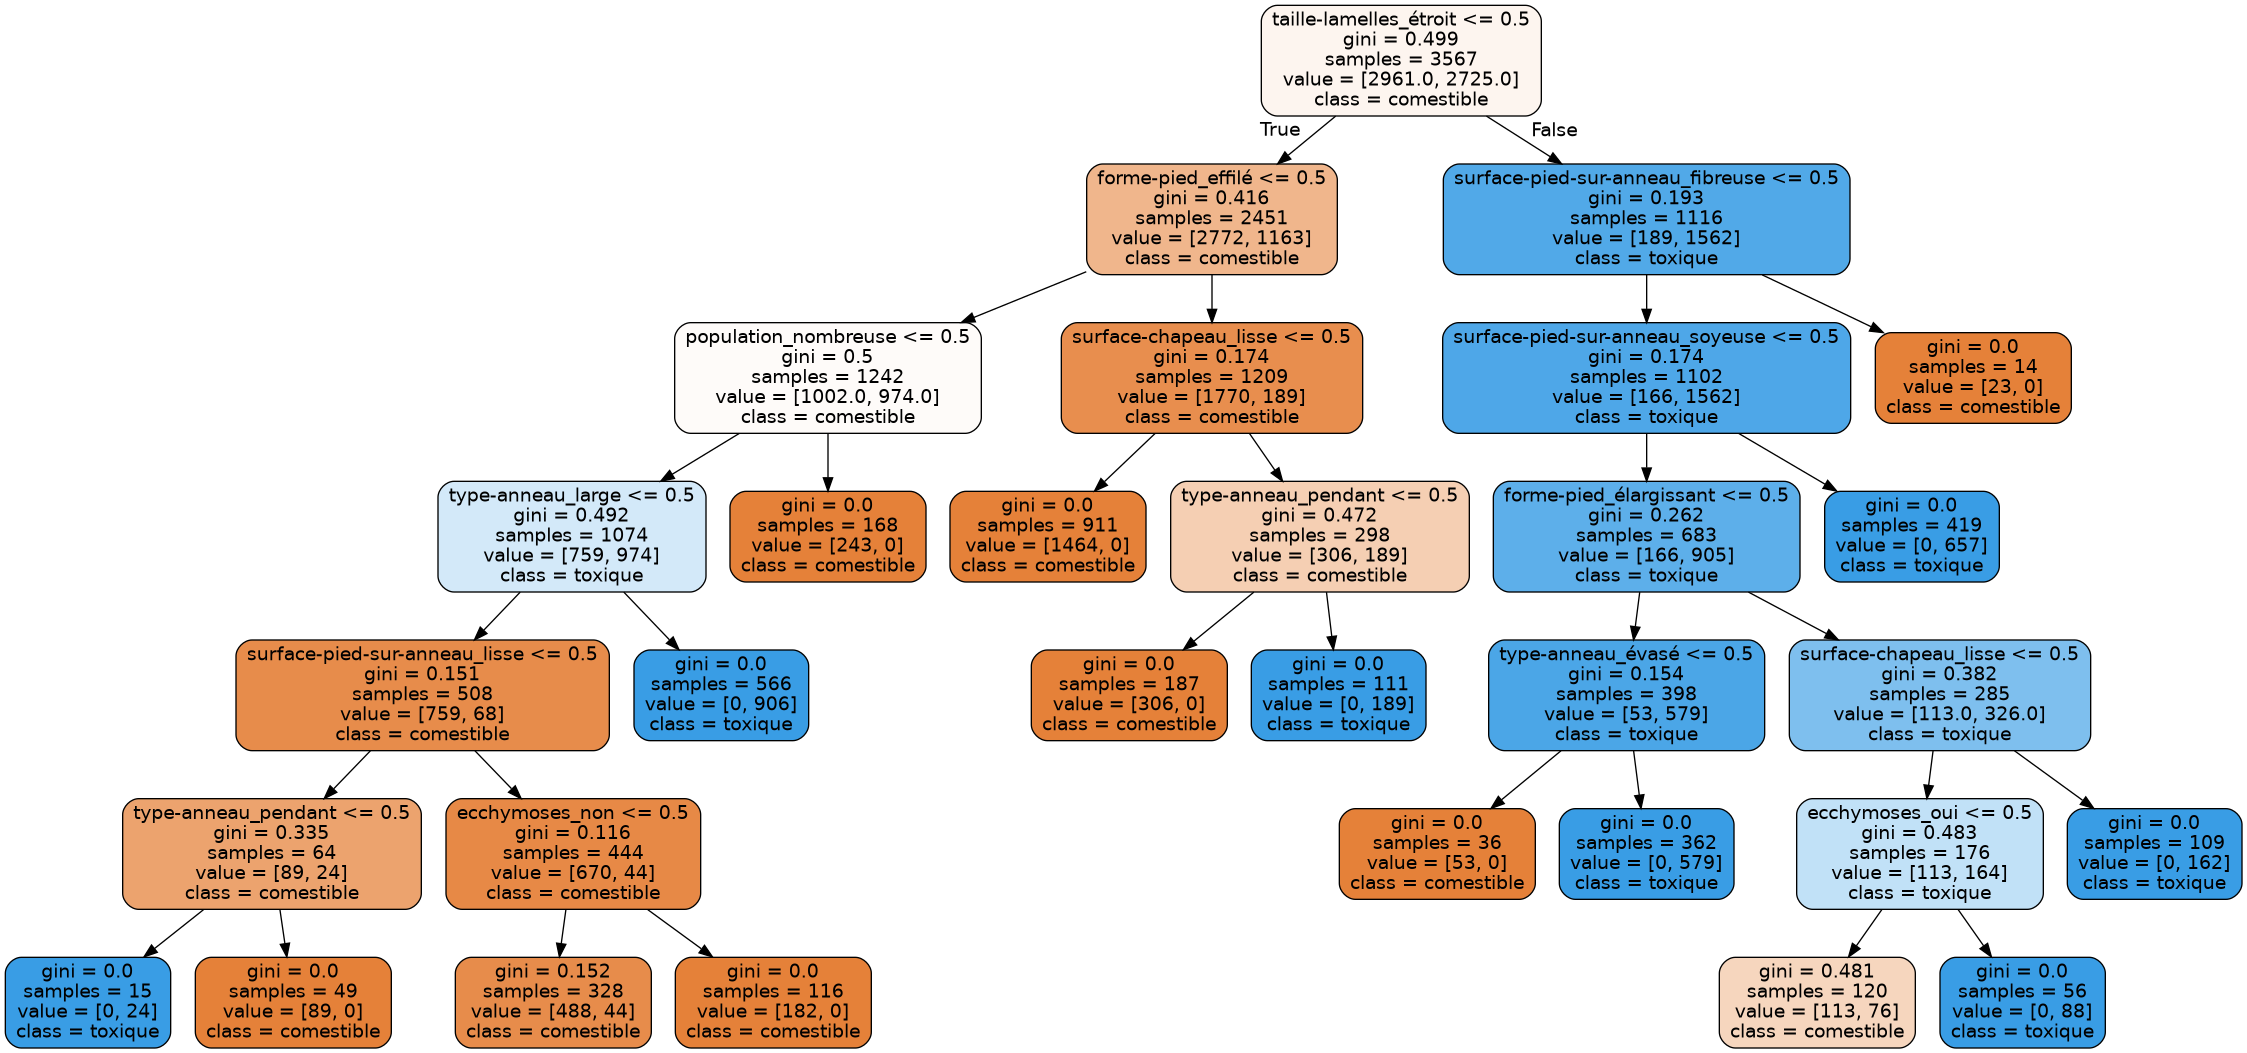

In [50]:
from random import randint
for i in range(3):
    tree_index = np.random.randint(rf_clf.n_estimators)

    print(f"\nArbre #{tree_index} sur {rf_clf.n_estimators}")

    # Exporter l'arbre au format .dot
    export_graphviz(
        rf_clf.estimators_[tree_index],
        out_file=f"mushroom_tree_{i+1}.dot",
        feature_names=features_train.columns,
        class_names=['comestible', 'toxique'],
        rounded=True,
        filled=True
    )

    # Convertir en PNG avec graphviz
    os.system(f"dot -Tpng mushroom_tree_{i+1}.dot -o mushroom_tree_{i+1}.png")

    # Afficher l'image
    print(f"Arbre {i+1} (index {tree_index}) :")
    display(Image(f"mushroom_tree_{i+1}.png"))

3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [51]:
accuracy_dev_rf = rf_clf.score(features_dev, labels_dev)
print("PERFORMANCES DU RANDOM FOREST")
print(f"Précision sur DEV   : {accuracy_dev_rf:.4f} ({accuracy_dev_rf*100:.2f}%)")

PERFORMANCES DU RANDOM FOREST
Précision sur DEV   : 0.9643 (96.43%)


## 4. optimisation des paramètres

4.1 En utilisant GridSearchCV, chercher la meilleure combinaison max_depth et n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [ ]:
from sklearn.model_selection import GridSearchCV


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

## 5. Stacking

Essayer différents modèles d'estimateur final

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier


## 6. Gradient Boosting

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

## 7. (Optionnel) Recommencer les exercices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?